In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib ipympl
# %matplotlib notebook

In [2]:
args={"SAMPLING_FREQ":10,
      "ROBOT_RADIUS":1
      }

In [3]:
class TwoWheelRobot:
    """2륜로봇 클래스 
    __init__ : 
        pos ([float,float]): position, 
        ang (float): degree,
        vel ([float,float]): velocity, 
        R (float): radius of robot =0.5 fix 
    """
    def __init__(self, pos=[0,0],vel=[0,0],head=0):
        self.pos = pos
        self.vel = vel
        self.head = head
        self.R = args["ROBOT_RADIUS"]    # robot radius
        self.dt = 1/args["SAMPLING_FREQ"]   # time resolution
    
    def set_pos(self,p):
        self.pos = p
        
    def set_vel(self,v):
        self.vel = v 
    
    def get_params(self):
        x,y = self.pos[0], self.pos[1]
        vl,vr = self.vel[0], self.vel[1]  
        head = self.head
        dt = self.dt
        L = 2*self.R    # wheel-base
        
        return x,y,vl,vr,head,dt,L
    
    def set_params(self,x,y,vl,vr,head):
        self.pos = [x,y]
        self.vel = [vl,vr]
        self.head = head 
        
    def draw(self, ax):
        x,y,vl,vr,head,dt,L = self.get_params()
        
        # draw robot body 
        draw_circle = plt.Circle([x,y], L/2)
        ax.add_patch(draw_circle)
        
        # draw line
        hx = x + L/2*np.cos(np.deg2rad(head))
        hy = y + L/2*np.sin(np.deg2rad(head))
        
        draw_line = plt.Line2D((x,hx),(y,hy),color='r')
        ax.add_line(draw_line)
        
    def move(self):
        x,y,vl,vr,head,dt,L = self.get_params()
        head = np.deg2rad(head)
        
        if vl == vr: 
            x = x + vl*dt*np.cos(head)
            y = y + vr*dt*np.sin(head)
            
        elif vl != vr:
            w = (vr-vl)/L
            rot_R = (L/2)*(vr+vr)/(vr-vl)
            cx = x - rot_R*np.sin(head)
            cy = y + rot_R*np.cos(head)
            
            dh = w*dt 
            dh_rad = dh

            rotate_center = np.array([x-cx,y-cy]).T
            rotate_matrix = np.array([[np.cos(dh_rad), -np.sin(dh_rad)],
                                      [np.sin(dh_rad), np.cos(dh_rad)]])
            
            rotate_w = rotate_matrix @ rotate_center
            
            x = cx + rotate_w[0]
            y = cy + rotate_w[1]
            head += dh
        else: 
            # TODOS: 뭐... 다른 기능을 넣던지.. 
            pass
        
        head = np.rad2deg(head)
        if head>180: 
            head -= 360
        if head<-180:
            head += 360
            
        # update param 
        self.set_params(x,y,vl,vr,head) 
        
    def record():
        pass
        # record: journey- 경로 자체를 다 녹음하게 하자 :: 

In [4]:
class Plotter:
    def __init__(self, robot, env=None, obstacles=None):
        self.robot = robot 
        self.env = env 
        self.obstacles = obstacles
        self.f = plt.figure(figsize=(10,10))
        self.ax = self.f.add_subplot()
        
    def set_env(self):
        if self.env:
            x_min, x_max, y_min, y_max = self.env.get_area
            self.f.set_xlim = (x_min, x_max)
            self.f.set_ylim = (y_min, y_max)
            # 만들어지면 테스트 
        else: 
            print("env setting please")
            pass
    
    def draw(self):
        # set aspect: axis equal 
        # self.f = plt.axes(xlim=(-10,10), ylim=(-10,10))
        # self.ax.clear()
        self.ax.set_aspect('equal')
        self.ax.grid()
        self.ax.set_xlim([-10, 10])
        self.ax.set_ylim([-10, 10])
        
        if self.env: 
            self.env.draw(self.ax)
        if self.obstacles:
            self.obstacles.draw(self.ax)
        self.robot.draw(self.ax)
        
        self.ax.set_title("title")
        
        
        

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100


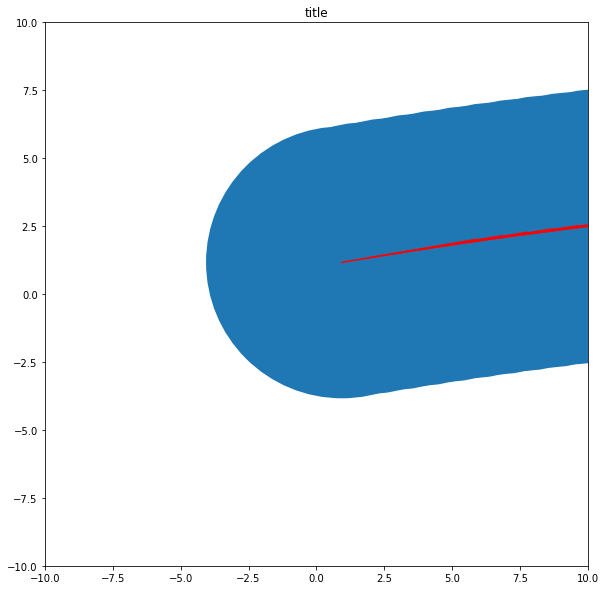

In [5]:
import time 
from IPython.display import HTML
from celluloid import Camera
from IPython import display


robot = TwoWheelRobot(pos=[0,1],vel=[10,9.5],head=10)
plotter = Plotter(robot)
camera = Camera(plotter.f)

iter_ = 0
while iter_<100:
    robot.move()
    plotter.draw()
    # plt.show
    # display.clear_output(wait=True)
    # display.display(plotter.f)
    
    camera.snap()
    
    
    # time.sleep(0.01)
    iter_ += 1
    print(iter_) # 
    # print(iter_, robot.pos, np.rad2deg(robot.head), end='\r') # 

animation = camera.animate() #interval=1000, repeat=True


In [15]:
plotter.draw()
plt.show()
plotter.robot.pos

[93.74591496585418, -6.088191499243038]

In [16]:
animation.save('animation.mp4')

In [6]:
HTML(animation.to_html5_video())

In [23]:
help(Camera)

Help on class Camera in module celluloid:

class Camera(builtins.object)
 |  Camera(figure: matplotlib.figure.Figure) -> None
 |  
 |  Make animations easier.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, figure: matplotlib.figure.Figure) -> None
 |      Create camera from matplotlib figure.
 |  
 |  animate(self, *args, **kwargs) -> matplotlib.animation.ArtistAnimation
 |      Animate the snapshots taken.
 |      
 |      Uses matplotlib.animation.ArtistAnimation
 |      
 |      Returns
 |      -------
 |      ArtistAnimation
 |  
 |  snap(self) -> List[matplotlib.artist.Artist]
 |      Capture current state of the figure.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)

